In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
import math
import seaborn as sns
import matplotlib.pyplot as plt

### Organizing dataframe

In [6]:
# Read in data for biological sciences department
df_hum_rec = pd.read_csv("capes/humanities_capes.csv", usecols= ['Instructor','Rcmnd Instr'])

# Change percent reccomend to decimal
df_hum_rec['Rcmnd Instr'] = df_hum_rec['Rcmnd Instr'].str.rstrip('%').astype('float') / 100.0

# Array with women professors
women_profs = ['Markman, Kristina', 'Giordano, Kailey Nicole', 'Zroka, Amy Liane', 'Boettcher, Carolin', 'Thompson, Katherine Anne Merit', 'Demetriou, Denise', 'Greene, Blythe Anastasia', 'Smarr, Janet L.', 'Caciola, Nancy A', 'Solomon, Amanda Lee Albaniel','Jed, Stephanie H', 'Bialo, Caralyn Alyssa','Lampert-Weissig, Lisa', 'Stevens, Jane', 'Steiner, Jill', 'Kugler, Emily MeriNitta'] 

In [7]:
df_hum_rec

,Instructor,Rcmnd Instr
0,"Chodorow, Stanley A.",0.615
1,"Chodorow, Stanley A.",0.625
2,"Chodorow, Stanley A.",0.660
3,"Markman, Kristina",1.000
4,"Markman, Kristina",0.943
...,...,...
310,"Rutherford, Donald Paul",0.957
311,"Steiner, Jill",1.000
312,"Rutherford, Donald Paul",1.000
313,"Steiner, Jill",1.000


In [8]:
# Drop null values
df_hum_rec = df_hum_rec.dropna()

# Rename columns for convenience
df_hum_rec = df_hum_rec.rename(columns={"Instructor":"prof", "Rcmnd Instr":"rec_percent", "Gender": "gender"})

In [10]:
df_hum_rec.head()

,prof,rec_percent
0,"Chodorow, Stanley A.",0.615
1,"Chodorow, Stanley A.",0.625
2,"Chodorow, Stanley A.",0.660
3,"Markman, Kristina",1.000
4,"Markman, Kristina",0.943


In [11]:
# Average out reccomend percent for all classes professor has taught
df_hum_rec_avg = df_hum_rec.groupby('prof', as_index=False).mean()

# Add column for gender for professor
df_hum_rec_avg['gender'] = np.where(df_hum_rec_avg['prof'].isin(women_profs), "W", "M")

df_hum_rec_avg

,prof,rec_percent,gender
0,"Bialo, Caralyn Alyssa",1.000000,W
1,"Boettcher, Carolin",0.889000,W
2,"Caciola, Nancy A",0.929400,W
3,"Caldwell, Michael A.",0.996750,M
4,"Caldwell, Michael Alan",0.981187,M
5,"Cassedy, Steven Dennis",0.917700,M
6,"Chodorow, Stanley A.",0.797520,M
7,"Cox, Stephen D.",0.941846,M
8,"Demetriou, Denise",0.731000,W
9,"Edwards, Anthony",0.910667,M


### Descriptive Stats

In [12]:
df_hum_rec_avg['gender'].value_counts()

M    28
W    16
Name: gender, dtype: int64

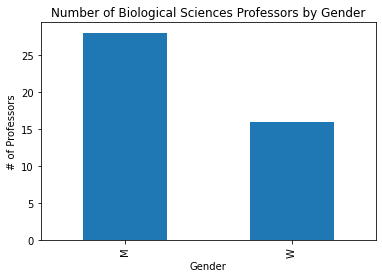

In [13]:
# Bar graphs with numbers of woman professors and men professors in Bio. Sci. department
ax_bio_count = df_hum_rec_avg['gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('# of Professors')
ax_bio_count.set_title('Number of Biological Sciences Professors by Gender')
f1 = plt.gcf()

Text(0, 0.5, 'Ratio Recommend Professor')

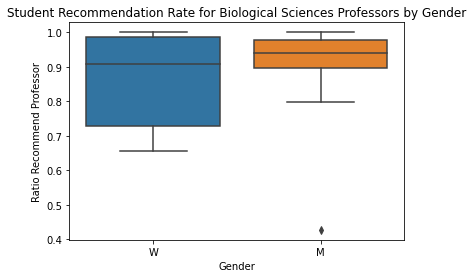

In [14]:
# Box Plots to see range of reccomendations for professors base on gender
ax_bio_rec_box = sns.boxplot(x="gender", y="rec_percent", data=df_hum_rec_avg)
ax_bio_rec_box.set_title('Student Recommendation Rate for Biological Sciences Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio Recommend Professor')

### Z-test

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/z-test/

##### Defining recommended: > 75

In [18]:
#z-test
df_hum_rec_avg['gender'].value_counts()

M    28
W    16
Name: gender, dtype: int64

In [19]:
num_women = 188
num_men = 2214

#num women recommended/total women
p1 = 163/num_women
p2 = 1741/num_men
print("P1: ", p1)
print("P2: ", p2)

P1:  0.8670212765957447
P2:  0.7863595302619693


In [20]:
#overall proportion
p = (163+1741)/(188+2214)
print("P: ", p)

P:  0.7926727726894255


In [21]:
df_hum_rec_avg.loc[(df_hum_rec_avg['rec_percent'] > 0.75) & (df_hum_rec_avg['gender'] == "W")] 

,prof,rec_percent,gender
0,"Bialo, Caralyn Alyssa",1.000000,W
1,"Boettcher, Carolin",0.889000,W
2,"Caciola, Nancy A",0.929400,W
10,"Giordano, Kailey Nicole",0.982286,W
12,"Greene, Blythe Anastasia",0.843000,W
15,"Jed, Stephanie H",1.000000,W
26,"Markman, Kristina",0.950917,W
33,"Solomon, Amanda Lee Albaniel",0.986286,W
34,"Steiner, Jill",1.000000,W
36,"Thompson, Katherine Anne Merit",0.985500,W


In [22]:
#z-test formula
z = ((p1-p2)-0)/math.sqrt((p*(1-p))*((1/num_women)+(1/num_men)))
z

2.6192304518614566

In [23]:
# z-score associated with a 5% alpha level / 2 is 1.96.
# 2.619 > 1.96, reject the null hypothesis (so proportions are not the same)

### T-test

https://www.statisticshowto.com/probability-and-statistics/t-test/ 

https://www.statisticshowto.com/probability-and-statistics/t-distribution/independent-samples-t-test/

### *Hypothesis Testing*

$H_o$: There is no difference between whether a man or woman professor is reccomended

$H_a$: There is a difference between whether a man or woman proffesor is reccomended

In [19]:
rp.ttest(group1= df_bio_rec_avg['rec_percent'][df_bio_rec_avg['gender'] == "W"], group1_name= "Woman",
         group2= df_bio_rec_avg['rec_percent'][df_bio_rec_avg['gender'] == "M"], group2_name= "Man")

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Woman   47.0  0.903321  0.078561  0.011459   0.880255  0.926388
 1       Man  265.0  0.874659  0.143724  0.008829   0.857275  0.892043
 2  combined  312.0  0.878977  0.136211  0.007711   0.863804  0.894150,
             Independent t-test   results
 0  Difference (Woman - Man) =     0.0287
 1        Degrees of freedom =   310.0000
 2                         t =     1.3312
 3     Two side test p value =     0.1841
 4    Difference < 0 p value =     0.9079
 5    Difference > 0 p value =     0.0921
 6                 Cohen's d =     0.2107
 7                 Hedge's g =     0.2102
 8             Glass's delta =     0.3648
 9               Pearson's r =     0.0754)